<a href="https://colab.research.google.com/github/mn000000/Simulacion-2/blob/main/Acciones_PG_24_05_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


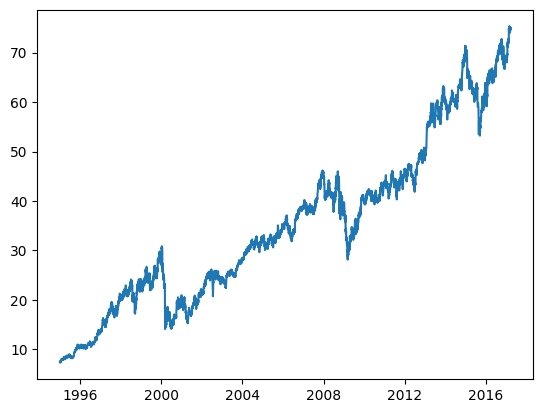

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime

ticker='PG'
start = datetime.datetime(1995,1,1)
end = datetime.datetime(2017,3,23)

try:
    data = yf.download(ticker, start=start, end=end)['Adj Close']
    PG = pd.DataFrame(data)
    #data.columns = [ticker]
    #print(data.head())
except Exception as e:
    print(f"Ocurrio un error al intentar descargar los datos:{e}")

PG.head()
PG.tail()
plt.plot(PG)

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2017-03-16    0.000437
2017-03-17   -0.004823
2017-03-20    0.002415
2017-03-21   -0.000329
2017-03-22   -0.002196
Name: simple_return, Length: 5595, dtype: float64
10.257%


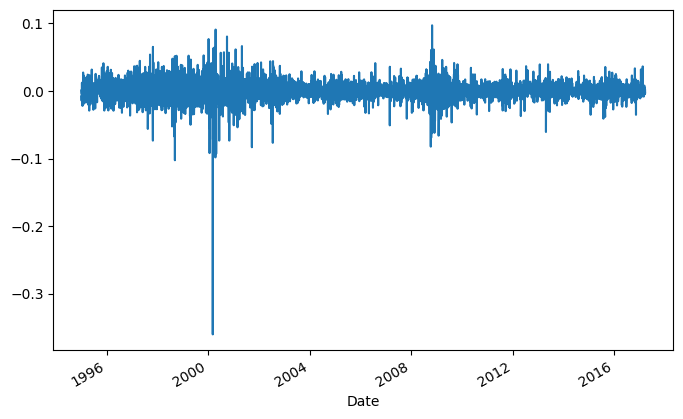

In [5]:
PG['simple_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
print(PG['simple_return'])
PG['simple_return'].plot(figsize=(8,5))
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

# Este es el retorno diario
# El retorno anual, se calcula no multiplicando por 365, pues no hay actividad diaria realmente.
# Por quitar días sabado, domingo y feriados.
# Lo correcto es 250, a veces 251 o 252
# Así, el retorno anual es
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a
print(str(round(avg_returns_a, 5) * 100) + '%')